In [1]:
# Download data from Chicago data portal to local directory
# https://data.cityofchicago.org/api/views/85ca-t3if/rows.csv?accessType=DOWNLOAD

In [2]:
# import custom functions and set autoreload
%load_ext autoreload
%autoreload 2
import functions as f

In [3]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Load and Clean Data

In [4]:
# Load the dataset
crash_df = pd.read_csv("Traffic_Crashes_-_Crashes.csv")
crash_df.columns

/tmp/ipykernel_2538/2798203692.py:2: DtypeWarning: Columns (31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  crash_df = pd.read_csv("Traffic_Crashes_-_Crashes.csv")


Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LA

In [5]:
# drop columns that are not useful for analysis
crash_df.drop(["CRASH_RECORD_ID", "RD_NO", "CRASH_DATE_EST_I", "CRASH_DATE", "LANE_CNT", 
               "REPORT_TYPE", "INTERSECTION_RELATED_I", "NOT_RIGHT_OF_WAY_I", "HIT_AND_RUN_I", 
               "DATE_POLICE_NOTIFIED", "BEAT_OF_OCCURRENCE", "PHOTOS_TAKEN_I", "STATEMENTS_TAKEN_I", 
               "DOORING_I", "WORK_ZONE_I", "WORK_ZONE_TYPE", "WORKERS_PRESENT_I", "NUM_UNITS", 'FIRST_CRASH_TYPE', 'CRASH_TYPE',
               'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
               'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN','LOCATION'], axis=1, inplace=True)
print(crash_df.shape, crash_df.columns)
crash_df.dropna(axis=0, how="any", inplace=True)
crash_df.shape

(671930, 19) Index(['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'DAMAGE',
       'STREET_NAME', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')


(666265, 19)

In [6]:
# info about dataset columns
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666265 entries, 0 to 671929
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   POSTED_SPEED_LIMIT      666265 non-null  int64  
 1   TRAFFIC_CONTROL_DEVICE  666265 non-null  object 
 2   DEVICE_CONDITION        666265 non-null  object 
 3   WEATHER_CONDITION       666265 non-null  object 
 4   LIGHTING_CONDITION      666265 non-null  object 
 5   TRAFFICWAY_TYPE         666265 non-null  object 
 6   ALIGNMENT               666265 non-null  object 
 7   ROADWAY_SURFACE_COND    666265 non-null  object 
 8   ROAD_DEFECT             666265 non-null  object 
 9   DAMAGE                  666265 non-null  object 
 10  STREET_NAME             666265 non-null  object 
 11  MOST_SEVERE_INJURY      666265 non-null  object 
 12  INJURIES_TOTAL          666265 non-null  float64
 13  INJURIES_FATAL          666265 non-null  float64
 14  CRASH_HOUR          

In [7]:
# Lets encode our target labels
le = preprocessing.LabelEncoder()
crash_df.DAMAGE = le.fit_transform(crash_df.DAMAGE)
crash_df.DAMAGE.value_counts()

2    402210
1    185006
0     79049
Name: DAMAGE, dtype: int64

In [8]:
# change crash_df.DAMAGE to 0 if 0 or 1 and 1 if 2
print(crash_df.DAMAGE.value_counts())
crash_df.DAMAGE = crash_df.DAMAGE.apply(lambda x: 0 if x < 2 else 1)
print(crash_df.DAMAGE.value_counts())
# Damage is now encoded as 0 for less than $1500 and 1 for more than $1500
# clean GPS data
crash_df = crash_df[crash_df.LONGITUDE != 0.0]
crash_df = crash_df[crash_df.LATITUDE != 0.0]
print(np.unique(crash_df.DAMAGE, return_counts=True))

2    402210
1    185006
0     79049
Name: DAMAGE, dtype: int64
1    402210
0    264055
Name: DAMAGE, dtype: int64
(array([0, 1]), array([264034, 402192]))


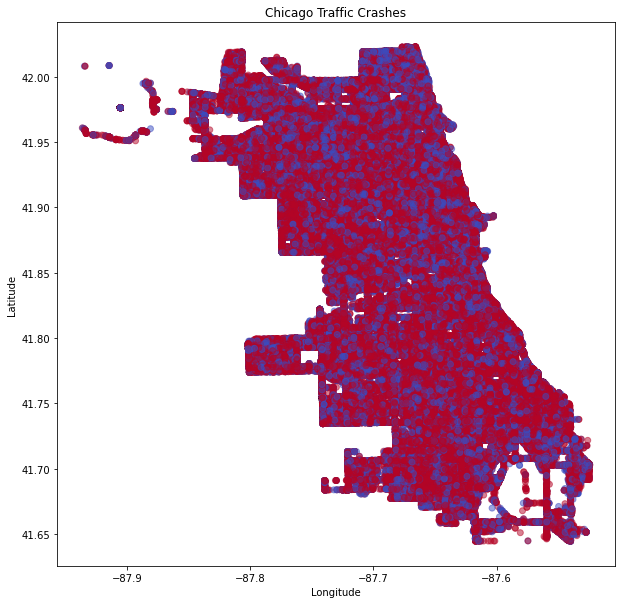

In [ ]:
# plot the data
plt.figure(figsize=(10, 10))
plt.scatter(crash_df.LONGITUDE, crash_df.LATITUDE, c=crash_df.DAMAGE, cmap="coolwarm", alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Chicago Traffic Crashes")
plt.show()


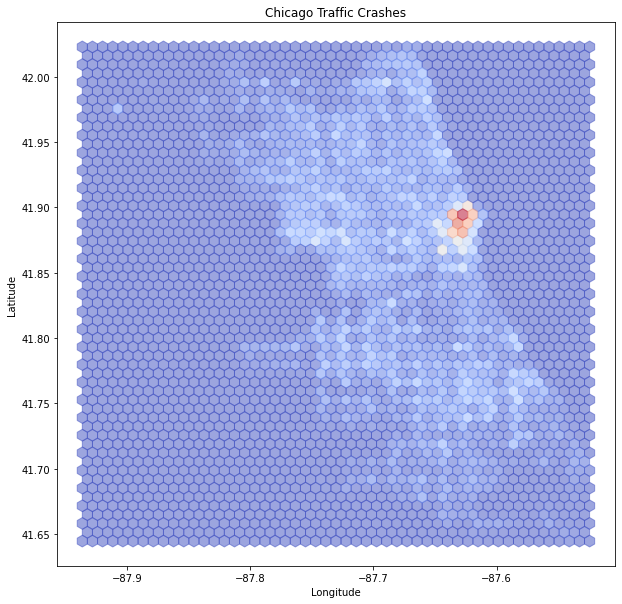

In [ ]:
# Hexbin plot
plt.figure(figsize=(10, 10))
plt.hexbin(crash_df.LONGITUDE, crash_df.LATITUDE, gridsize=50, cmap="coolwarm", alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Chicago Traffic Crashes")
plt.show()

In [10]:
crash_df.columns

Index(['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'DAMAGE',
       'STREET_NAME', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

X_train shape: (153231, 5)
X_test shape: (512995, 5)
y_train shape: (153231,)
y_test shape: (512995,)
X_train columns: Index(['LATITUDE', 'LONGITUDE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH'],
      dtype='object')
y_train unique values: 1    92504
0    60727
Name: DAMAGE, dtype: int64
y_test unique values: 1    309688
0    203307
Name: DAMAGE, dtype: int64


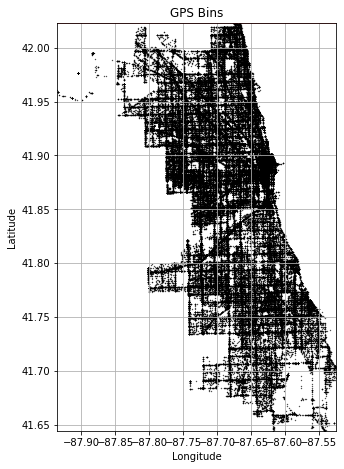

100%|██████████| 100/100 [00:02<00:00, 39.21it/s]

y_pred shape: (512995,)
y_pred value counts: (array([1.]), array([512995]))
y_test value counts: (array([0, 1]), array([203307, 309688]))


0.6036861957718886

In [24]:
# Logisitic Regression with only GPS data, no binning (small enough it can be done in memory)

y = crash_df.DAMAGE
X = crash_df.drop("DAMAGE", axis=1)

# remove all columns not LATITUDE or LONGITUDE
X = X[["LATITUDE", "LONGITUDE"]]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.77, random_state=42, stratify=y
)


print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"X_train columns: {X_train.columns}")
print(f"y_train unique values: {y_train.value_counts()}")
print(f"y_test unique values: {y_test.value_counts()}")

f.plot_bins(X_train, 1, 1)
model = f.LogisticRegression(n_iters=100)
model.train(X_train, y_train)
y_pred = model.predict(X_test)
print(f"y_pred shape: {y_pred.shape}")
print(f"y_pred value counts: {np.unique(y_pred, return_counts=True)}")
print(f"y_test value counts: {np.unique(y_test, return_counts=True)}")
model.accuracy(y_pred, y_test)

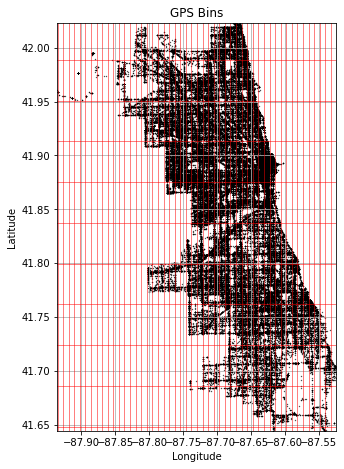

X_train shape: (153231, 600)
X_test shape: (512995, 600)
y_train shape: (153231,)
y_test shape: (512995,)
y_train unique values: 1    92504
0    60727
Name: DAMAGE, dtype: int64
y_test unique values: 1    309688
0    203307
Name: DAMAGE, dtype: int64


100%|██████████| 100/100 [00:44<00:00,  2.24it/s]


y_pred shape: (512995, 600)
y_pred value counts: (array([1.]), array([512995]))
y_test value counts: (array([0, 1]), array([203307, 309688]))
Model Accuracy 0.6036861957718886
y_pred sigmoid outputs
                   0
count  512995.000000
mean        0.574485
std         0.000694
min         0.572782
25%         0.573953
50%         0.574362
75%         0.575074
max         0.576198
y_pred rounded sigmoid outputs
              0
count  512995.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0


0.6036861957718886

In [14]:
y = crash_df.DAMAGE
X = crash_df.drop("DAMAGE", axis=1)

# remove all columns not LATITUDE or LONGITUDE
X = X[["LATITUDE", "LONGITUDE"]]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.77, random_state=42, stratify=y
)
f.plot_bins(X_train, 100, 500)

binned_X_train = f.dummy_data(X_train, 100, 500)
binned_X_test = f.dummy_data(X_test, 100, 500)

print(f"X_train shape: {binned_X_train.shape}")
print(f"X_test shape: {binned_X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_train unique values: {y_train.value_counts()}")
print(f"y_test unique values: {y_test.value_counts()}")

model = f.LogisticRegression(n_iters=100)
model.train(binned_X_train, y_train)
y_pred = model.predict(binned_X_test)
print(f"y_pred shape: {binned_X_test.shape}")
print(f"y_pred value counts: {np.unique(y_pred, return_counts=True)}")
print(f"y_test value counts: {np.unique(y_test, return_counts=True)}")

# testing a bunch of shit
y_pred_sigmoid = pd.DataFrame(model.y_pred_sigmoid)
print(f"Model Accuracy {model.accuracy(y_pred, y_test)}")
print(f"y_pred sigmoid outputs")
print(y_pred_sigmoid.describe())
y_pred = np.rint(model.y_pred_sigmoid - .04)
print(f"y_pred rounded sigmoid outputs")
print(pd.DataFrame(y_pred).describe())
model.accuracy(y_pred, y_test)

In [11]:
fake_y_true = np.random.randint(0, 10, 153231)
fake_y_true[fake_y_true < 6] = 0
fake_y_true[fake_y_true >= 6] = 1
np.unique(fake_y_true, return_counts=True)
np.sum(fake_y_true == 0) / len(fake_y_true)

0.6006552198967572

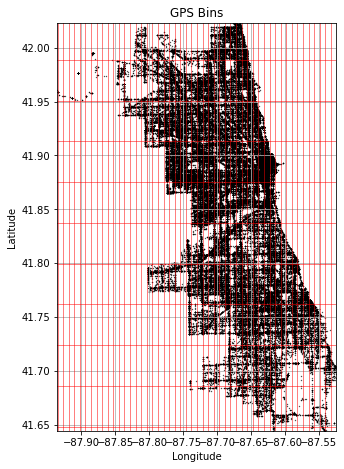

X_train shape: (153231, 603)
X_test shape: (512995, 603)
y_train shape: (153231,)
y_test shape: (512995,)
y_test unique values: 1    309688
0    203307
Name: DAMAGE, dtype: int64


100%|██████████| 100/100 [03:18<00:00,  1.98s/it]


y_pred shape: (512995, 603)
y_pred value counts: (array([1.]), array([512995]))
y_test value counts: (array([0, 1]), array([203307, 309688]))
Model Accuracy 0.6036861957718886
y_pred sigmoid outputs
                   0
count  512995.000000
mean        0.735188
std         0.065989
min         0.513878
25%         0.695712
50%         0.746224
75%         0.783936
max         0.860824
y_pred rounded sigmoid outputs
                   0
count  512995.000000
mean        0.996557
std         0.058572
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000


0.6022709772999737

In [13]:
# Logistic Regression with binning and other numerical (non-categorical) data

y = crash_df.DAMAGE
X = crash_df.drop("DAMAGE", axis=1)

# remove all columns not LATITUDE or LONGITUDE
X = X[["LATITUDE", "LONGITUDE", 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.77, random_state=42, stratify=y
)
f.plot_bins(X_train, 100, 500)

binned_X_train = f.dummy_data(X_train, 100, 500)
binned_X_test = f.dummy_data(X_test, 100, 500)

print(f"X_train shape: {binned_X_train.shape}")
print(f"X_test shape: {binned_X_test.shape}")
print(f"y_train shape: {fake_y_true.shape}")
print(f"y_test shape: {y_test.shape}")
# print(f"y_train unique values: {fake_y_true.value_counts()}")
print(f"y_test unique values: {y_test.value_counts()}")

model = f.LogisticRegression(n_iters=100)
model.train(binned_X_train, fake_y_true)
y_pred = model.predict(binned_X_test)
print(f"y_pred shape: {binned_X_test.shape}")
print(f"y_pred value counts: {np.unique(y_pred, return_counts=True)}")
print(f"y_test value counts: {np.unique(y_test, return_counts=True)}")

# testing a bunch of shit
y_pred_sigmoid = pd.DataFrame(model.y_pred_sigmoid)
print(f"Model Accuracy {model.accuracy(y_pred, y_test)}")
print(f"y_pred sigmoid outputs")
print(y_pred_sigmoid.describe())
y_pred = np.rint(model.y_pred_sigmoid - .04)
print(f"y_pred rounded sigmoid outputs")
print(pd.DataFrame(y_pred).describe())
model.accuracy(y_pred, y_test)

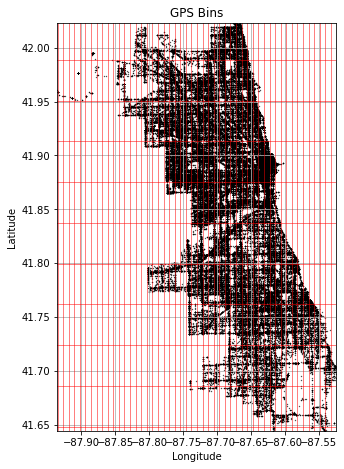

X_train shape: (153231, 603)
X_test shape: (512995, 603)
y_train shape: (153231,)
y_test shape: (512995,)
y_train unique values: 1    92504
0    60727
Name: DAMAGE, dtype: int64
y_test unique values: 1    309688
0    203307
Name: DAMAGE, dtype: int64


100%|██████████| 100/100 [03:00<00:00,  1.80s/it]


: 

: 

In [39]:
# Logistic Regression with binning and other numerical (non-categorical) data

y = crash_df.DAMAGE
X = crash_df.drop("DAMAGE", axis=1)

# remove all columns not LATITUDE or LONGITUDE
X = X[["LATITUDE", "LONGITUDE", 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.77, random_state=42, stratify=y
)
f.plot_bins(X_train, 100, 500)

binned_X_train = f.dummy_data(X_train, 100, 500)
binned_X_test = f.dummy_data(X_test, 100, 500)

print(f"X_train shape: {binned_X_train.shape}")
print(f"X_test shape: {binned_X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_train unique values: {y_train.value_counts()}")
print(f"y_test unique values: {y_test.value_counts()}")

model = f.LogisticRegression(n_iters=100)
model.train(binned_X_train, y_train)
y_pred = model.predict(binned_X_test)
print(f"y_pred shape: {binned_X_test.shape}")
print(f"y_pred value counts: {np.unique(y_pred, return_counts=True)}")
print(f"y_test value counts: {np.unique(y_test, return_counts=True)}")

# testing a bunch of shit
y_pred_sigmoid = pd.DataFrame(model.y_pred_sigmoid)
print(f"Model Accuracy {model.accuracy(y_pred, y_test)}")
print(f"y_pred sigmoid outputs")
print(y_pred_sigmoid.describe())
y_pred = np.rint(model.y_pred_sigmoid - .04)
print(f"y_pred rounded sigmoid outputs")
print(pd.DataFrame(y_pred).describe())
model.accuracy(y_pred, y_test)

In [37]:
y_pred_sigmoid = pd.DataFrame(model.y_pred_sigmoid)
print(f"Model Accuracy {model.accuracy(y_pred, y_test)}")
print(f"y_pred sigmoid outputs")
print(y_pred_sigmoid.describe())
y_pred = np.rint(model.y_pred_sigmoid - .04)
print(f"y_pred rounded sigmoid outputs")
print(pd.DataFrame(y_pred).describe())
model.accuracy(y_pred, y_test)

Model Accuracy 0.5965145859121433
y_pred sigmoid outputs
                   0
count  512995.000000
mean        0.593249
std         0.027564
min         0.517089
25%         0.573080
50%         0.594491
75%         0.614321
max         0.657720
y_pred rounded sigmoid outputs
                   0
count  512995.000000
mean        0.974076
std         0.158909
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000


0.5965145859121433

Number of vertical bins: 1
Number of horizontal bins: 500
Plotting bins... (Only shows every 10th bin line for each vert and horz
Gives bin shape but each bin 10x smaller


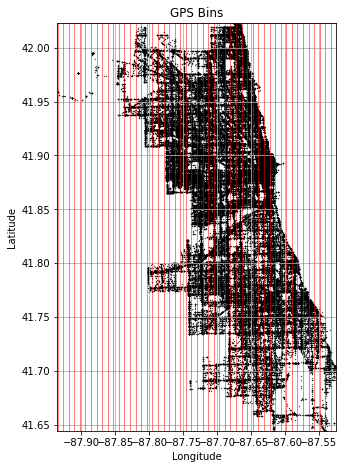

100%|██████████| 100/100 [00:36<00:00,  2.75it/s]


First 10 values of prediction: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Unique values in prediction: (array([0.]), array([512995]))
First 10 values of actual: 81014     1
280048    1
316359   -1
346770    1
351978   -1
158919    1
302623    1
384820    1
61379    -1
307954    1
Name: DAMAGE, dtype: int64
y_test total 1s divided by total: 0.20737239154377723
Accuracy:  0.0
Number of vertical bins: 51
Number of horizontal bins: 450
Plotting bins... (Only shows every 10th bin line for each vert and horz
Gives bin shape but each bin 10x smaller


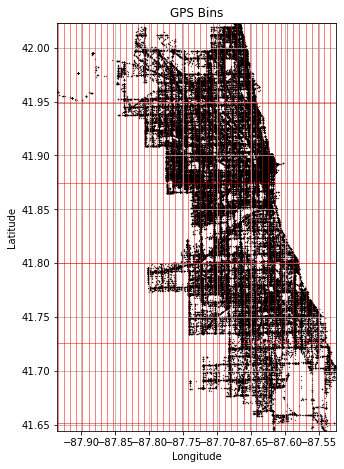

100%|██████████| 100/100 [00:37<00:00,  2.70it/s]


First 10 values of prediction: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Unique values in prediction: (array([0.]), array([512995]))
First 10 values of actual: 81014     1
280048    1
316359   -1
346770    1
351978   -1
158919    1
302623    1
384820    1
61379    -1
307954    1
Name: DAMAGE, dtype: int64
y_test total 1s divided by total: 0.20737239154377723
Accuracy:  0.0
Accuracy Change: 0.0
Number of vertical bins: 101
Number of horizontal bins: 400
Plotting bins... (Only shows every 10th bin line for each vert and horz
Gives bin shape but each bin 10x smaller


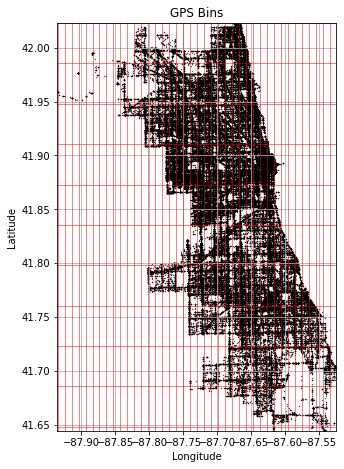

 84%|████████▍ | 84/100 [00:46<00:08,  1.80it/s]


KeyboardInterrupt: 

In [14]:
models_1 = f.gps_crawl(crash_df, n_iters=100, gps_only=True, plot_loss=False, filename="gps_only")
models_2 = f.gps_crawl(crash_df, n_iters=100, gps_only=False, plot_loss=False, filename="gps_and_time")

C:\Users\joehe\AppData\Local\Temp\ipykernel_1112\2596250911.py:3: DtypeWarning: Columns (31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  crash_df = pd.read_csv("Traffic_Crashes_-_Crashes.csv")


(666226,)
(666226,)


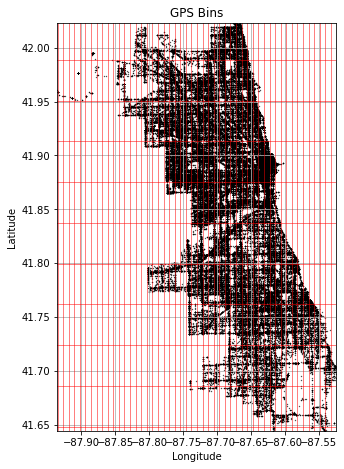

X_train shape: (153231, 603)
X_test shape: (512995, 603)
y_train shape: (153231,)
y_test shape: (512995,)
y_train unique values: 1    92504
0    60727
Name: DAMAGE, dtype: int64
y_test unique values: 1    309688
0    203307
Name: DAMAGE, dtype: int64


100%|██████████| 1000/1000 [20:11<00:00,  1.21s/it]


y_pred shape: (512995, 603)
y_pred value counts: (array([1]), array([512995], dtype=int64))
y_test value counts: (array([0, 1], dtype=int64), array([203307, 309688], dtype=int64))


0.6036861957718886

In [46]:
import this

crash_df = pd.read_csv("Traffic_Crashes_-_Crashes.csv")
crash_df.drop(["CRASH_RECORD_ID", "RD_NO", "CRASH_DATE_EST_I", "CRASH_DATE", "LANE_CNT", 
               "REPORT_TYPE", "INTERSECTION_RELATED_I", "NOT_RIGHT_OF_WAY_I", "HIT_AND_RUN_I", 
               "DATE_POLICE_NOTIFIED", "BEAT_OF_OCCURRENCE", "PHOTOS_TAKEN_I", "STATEMENTS_TAKEN_I", 
               "DOORING_I", "WORK_ZONE_I", "WORK_ZONE_TYPE", "WORKERS_PRESENT_I", "NUM_UNITS", 'FIRST_CRASH_TYPE', 'CRASH_TYPE',
               'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
               'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN','LOCATION'], axis=1, inplace=True)

crash_df.dropna(axis=0, how="any", inplace=True)

# Lets encode our target labels
le = preprocessing.LabelEncoder()
crash_df.DAMAGE = le.fit_transform(crash_df.DAMAGE)
crash_df.DAMAGE.value_counts()

# change crash_df.DAMAGE to 0 if 0 or 1 and 1 if 2
crash_df.DAMAGE = crash_df.DAMAGE.apply(lambda x: 0 if x < 2 else 1)
crash_df.DAMAGE.value_counts()
# Damage is now encoded as 0 for less than $1500 and 1 for more than $1500
# clean GPS data
crash_df = crash_df[crash_df.LONGITUDE != 0.0]
crash_df = crash_df[crash_df.LATITUDE != 0.0]
print(crash_df.LONGITUDE.shape)
print(crash_df.LATITUDE.shape)

y = crash_df.DAMAGE
X = crash_df.drop("DAMAGE", axis=1)

# remove all columns not LATITUDE or LONGITUDE
X = X[["LATITUDE", "LONGITUDE", 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.77, random_state=42, stratify=y
)
f.plot_bins(X_train, 100, 500)

binned_X_train = f.dummy_data(X_train, 100, 500)
binned_X_test = f.dummy_data(X_test, 100, 500)

print(f"X_train shape: {binned_X_train.shape}")
print(f"X_test shape: {binned_X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_train unique values: {y_train.value_counts()}")
print(f"y_test unique values: {y_test.value_counts()}")

thismodel = this.LogisticRegression()
thismodel.fit(binned_X_train, y_train)
y_pred = thismodel.predict(binned_X_test)
print(f"y_pred shape: {binned_X_test.shape}")
print(f"y_pred value counts: {np.unique(y_pred, return_counts=True)}")
print(f"y_test value counts: {np.unique(y_test, return_counts=True)}")
this.accuracy(y_test, y_pred)


(512995,)